# **Introduction**
Diabetes is a chronic disease that occurs either when the pancreas do not produce enough insulin or when the body cannot effectively use the insulin it produces. It is a major cause of blindness, kidney failure, heart attacks, stroke and lower limb amputation.The number of people with diabetes rose from 108 million in 1980 to 422 million in 2014.

People living in low income communities face challenges related to lack of awareness, difficulty in accessing healthcare facilities and medications, and failure in achieving optimal diabetes management and preventing complications. **Some factors assosciated with diabetes are:**

1. Weight
2. Sugar level
3. Blood pressure
4. Injury to pancreas
5. Physical stress
6. Family history

**Aim:** To predict whether a woman belonging to the Pima Indian tribe has diabetes or not based on some independent varibales like Pregnancies, Skin Thickness, Blood Presure, Insulin, Age, Glucose, BMI and Diabetes Pedigree Function.


In [1]:
#importing the required libraries 
import numpy as np    
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
diabetes=pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

# **Basic Exploration**

In [3]:
diabetes.shape

(768, 9)

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
diabetes=diabetes.rename(columns={'BloodPressure':'Blood_Pressure','SkinThickness':'Skin_Thickness',
                                  'DiabetesPedigreeFunction':'Diabetes_Pedigree_Function'})

In [7]:
#checking the datatype of each column
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood_Pressure              768 non-null    int64  
 3   Skin_Thickness              768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   Diabetes_Pedigree_Function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#checking unique values for each column in order to find the incorrectly entered data
diabetes['Pregnancies'].unique()
diabetes['Glucose'].unique()
diabetes['Blood_Pressure'].unique()
diabetes['Skin_Thickness'].unique()
diabetes['Insulin'].unique()
diabetes['BMI'].unique()
diabetes['Diabetes_Pedigree_Function'].unique()
diabetes['Age'].unique()
diabetes['Outcome'].unique()

array([1, 0])

In [9]:
#replacing the corrupted values with Nan so that they can be read as missing values
diabetes_missing=diabetes.replace({'Glucose':{0:np.nan},'Blood_Pressure' :{0:np.nan},'Skin_Thickness':{0:np.nan},
                         'Insulin':{0:np.nan},'BMI':{0:np.nan}})

In [10]:
#finding the mean of missing values in each column
diabetes_missing.isna().mean()*100

Pregnancies                    0.000000
Glucose                        0.651042
Blood_Pressure                 4.557292
Skin_Thickness                29.557292
Insulin                       48.697917
BMI                            1.432292
Diabetes_Pedigree_Function     0.000000
Age                            0.000000
Outcome                        0.000000
dtype: float64

We can see that there are missing values in the Blood Pressure, Skin Thickness, Insulin and BMI columns. In the Insulin column, almost half the values are missing. Still we will not drop this column as Insulin level plays a vital role in predicting whether a person will have diabetes or not.

**Imputation using KNN technique**

In [11]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.2/296.2 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.6 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29899 sha256=bdb7f935881053b56a3103f7e4a43c543cb3c9be499d46790b00d4df1508821c
  Stored in directory: /root/.cache/pip/wheels/e3/04/06/a1a7d89ef4e631ce6268ea2d8cde04f7290651c1ff1025ce68
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=55c4836f498bf2c4998d1fe16ba4b8cff8d5b211f51eac55830eed370239bc6e
  Stored in directory: /root/.cache/pip/wheels/72/21/a8/a045cacd9838abd5643f6bfa852c079

In [12]:
from fancyimpute import KNN
knn_imputer=KNN()
diabetes_knn=diabetes_missing.copy(deep=True)
diabetes_knn.iloc[:,:]=knn_imputer.fit_transform(diabetes_knn)

(CVXPY) Feb 07 07:10:15 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.5.2237). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Feb 07 07:10:15 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.5.2237). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
Imputing row 1/768 with 1 missing, elapsed time: 0.111
Imputing row 101/768 with 2 missing, elapsed time: 0.113
Imputing row 201/768 with 1 missing, elapsed time: 0.115
Imputing row 301/768 with 3 missing, elapsed time: 0.117
Imputing row 401/768 with 2 missing, elapsed time: 0.118
Imputing row 501/768 with 0 missing, elapsed time: 0.120
Imputing row 601/768 with 1 missing, elapsed time: 0.122
Imputing row 701/768 with 0 missing, elapsed time: 0.124


In [13]:
diabetes_knn.isna().sum()

Pregnancies                   0
Glucose                       0
Blood_Pressure                0
Skin_Thickness                0
Insulin                       0
BMI                           0
Diabetes_Pedigree_Function    0
Age                           0
Outcome                       0
dtype: int64

In [14]:
diabetes_knn.duplicated().sum()

0

In [15]:
#skewness of the data can be found out by comaparing mean and median(50%) values
#presence of outliers can be detected by comparing the difference between 25% and min values and 75% and max values
diabetes_knn.describe()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.584935,72.390351,29.123094,153.843883,32.433551,0.471876,33.240885,0.348958
std,3.369578,30.530450,12.212685,9.496809,99.614837,6.885187,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.919593,88.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.085087,132.218586,32.150000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,35.000000,188.904879,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Outlier detection using box plot**

<AxesSubplot:ylabel='BMI'>

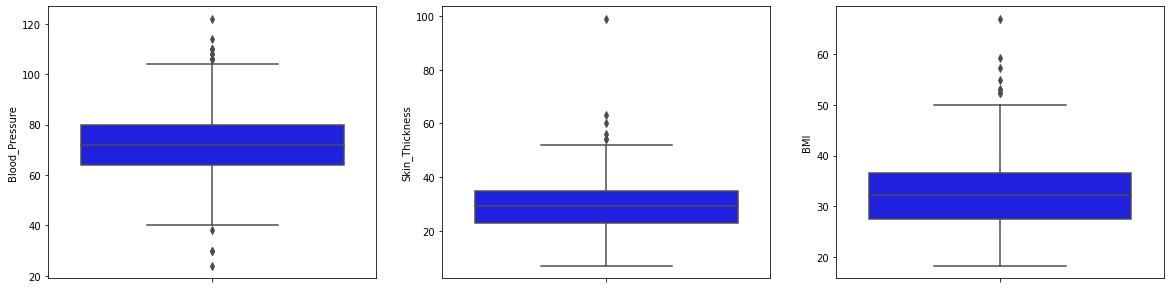

In [16]:
fig=plt.figure(figsize=(20,5))
plt.subplot(131)
sns.boxplot(y=diabetes_knn['Blood_Pressure'],color='blue')
plt.subplot(132)
sns.boxplot(y=diabetes_knn['Skin_Thickness'],color='blue')
plt.subplot(133)
sns.boxplot(y=diabetes_knn['BMI'],color='blue')

<AxesSubplot:ylabel='Age'>

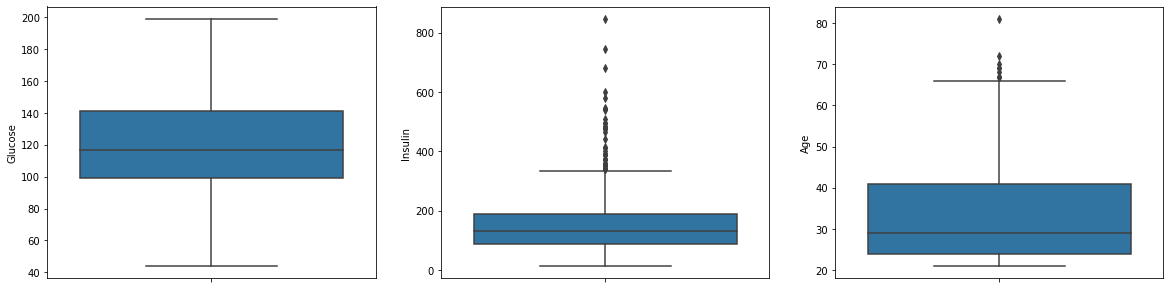

In [17]:
fig=plt.figure(figsize=(20,5))
plt.subplot(131)
sns.boxplot(y=diabetes_knn['Glucose'])
plt.subplot(132)
sns.boxplot(y=diabetes_knn['Insulin'])
plt.subplot(133)
sns.boxplot(y=diabetes_knn['Age'])


We can see that there are outliers in the Blood Pressure, Skin Thickness, BMI, Insulin and Age columns.

**Outlier handling**

In [18]:
df=diabetes_knn.copy()

In [19]:
low_perc_insulin = 0.1
high_perc_insulin =0.9
low_insulin,upper_insulin=df.Insulin.quantile([low_perc_insulin,high_perc_insulin])
print(low_insulin)
print(upper_insulin)

56.0
271.30000000000007


In [20]:
df=df[~((df.Insulin>272)|(df.Insulin<56))]

In [21]:
low_perc_bp = 0.1
high_perc_bp =0.9
low_bp,upper_bp=df.Blood_Pressure.quantile([low_perc_bp,high_perc_bp])
print(low_bp)
print(upper_bp)

58.0
88.0


In [22]:
df=df[~((df.Blood_Pressure>88)|(df.Blood_Pressure<58))]

In [23]:
low_perc_age = 0.1
high_perc_age =0.9
low_age,upper_age=df.Age.quantile([low_perc_age,high_perc_age])
print(low_age)
print(upper_age)

22.0
50.0


In [24]:
df=df[~((df.Age>50)|(df.Age<22))]

In [25]:
low_perc_BMI = 0.1
high_perc_BMI =0.9
low_BMI,upper_BMI=df.BMI.quantile([low_perc_BMI,high_perc_BMI])
print(low_BMI)
print(upper_BMI)

25.12
40.580000000000005


In [26]:
df=df[~((df.BMI>41)|(df.BMI<26))]

In [27]:
low_perc_st = 0.1
high_perc_st =0.9
low_st,upper_st=df.Skin_Thickness.quantile([low_perc_st,high_perc_st])
print(low_st)
print(upper_st)

19.0
40.0


In [28]:
df=df[~((df.Skin_Thickness>40)|(df.Skin_Thickness<19))]

In [29]:
low_perc_preg = 0.1
high_perc_preg =0.9
low_preg,upper_preg=df.Pregnancies.quantile([low_perc_preg,high_perc_preg])
print(low_preg)
print(upper_preg)

0.0
9.0


In [30]:
df=df[~((df.Pregnancies>9)|(df.Pregnancies<0))]

# **Data Visualization**

([<matplotlib.patches.Wedge at 0x7f81e9046110>,
 [Text(-0.3345263219938025, 1.0478989168299102, '0'),
  Text(0.3345263219938021, -1.0478989168299102, '1')],
 [Text(-0.18246890290571044, 0.5715812273617691, '59.8%'),
  Text(0.18246890290571025, -0.5715812273617692, '40.2%')])

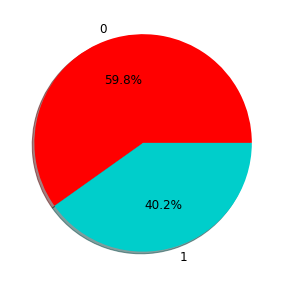

In [31]:
plt.figure(figsize=(25,5))
labels=[0,1]
values=df['Outcome'].value_counts()
plt.pie(values,labels=labels,colors=["red","#00CECB"],textprops = {'fontsize':12},shadow=True,autopct='%1.1f%%')


In our data 59.8% women do not have diabetes and 40.2% women have diabetes.

In [32]:
df.groupby('Outcome')['Skin_Thickness'].mean()

Outcome
0.0    29.661732
1.0    30.794982
Name: Skin_Thickness, dtype: float64

<AxesSubplot:xlabel='Outcome'>

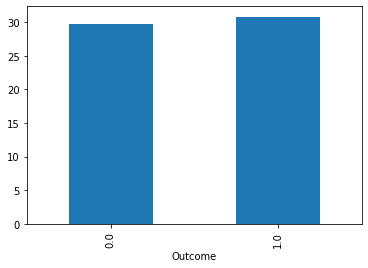

In [33]:
df.groupby('Outcome')['Skin_Thickness'].mean().plot.bar()

In [34]:
px.box(df, y='Skin_Thickness', color= 'Outcome',width=800,height=400)

Women with greater Skin thickness are more prone to diabetes.

In [35]:
px.box(df, y='Pregnancies', color= 'Outcome',width=800,height=400)

Women with more number of pregnancies are at a greater risk of having diabetes.

In [36]:
px.box(df,y='Insulin',color='Outcome',width=700,height=350)

In [37]:
px.box(df,y='Glucose',color='Outcome',width=700,height=350)

Gluocose level of 99 mg/dL is considered normal.
Glucose level between 100-125 mg/dL indicates prediabetes.
But here we can observe that even those women who have a glucose level less than the normal value have diabetes.

<AxesSubplot:xlabel='Outcome'>

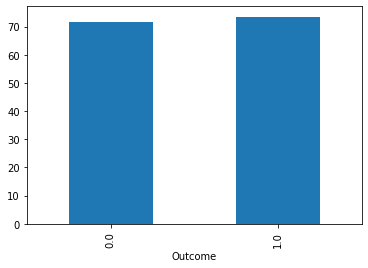

In [38]:
df.groupby('Outcome')['Blood_Pressure'].mean().plot.bar()

In [39]:
px.box(df,y='Blood_Pressure',x='Outcome',width=800,height=400)


Women with a higher Blood Pressure are more prone to diabetes.

<AxesSubplot:xlabel='Outcome'>

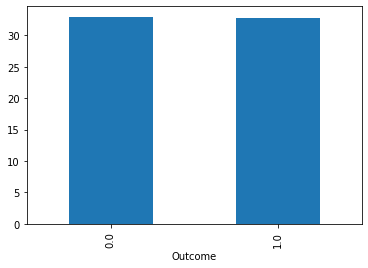

In [40]:
df.groupby('Outcome')['BMI'].mean().plot.bar()

In [41]:
px.box(df,y='BMI',x='Outcome',width=800,height=400)

The BMI of women who have diabetes is almost same as the BMI of women who do not have diabetes.

In [42]:
px.box(df,y='Age',color='Outcome',width=800,height=400)


With age, the chances of having diabetes increases.

In [43]:
px.scatter(diabetes_knn,y='BMI',x='Age',color='Outcome',title='BMI and Age vs Outcome',width=800,height=400)

In [44]:
px.scatter(diabetes_knn,y='BMI',x='Glucose',color='Outcome',title='BMI and Glucose vs Outcome',width=800,height=400)

In [45]:
px.scatter(diabetes_knn,y='Insulin',x='Age',color='Outcome',title='Insulin and Age vs Outcome',width=800,height=400)

In [46]:
px.scatter(diabetes_knn,y='Glucose',x='Age',color='Outcome',title='Glucose and Age vs Outcome',width=800,height=400)

In [47]:
px.scatter(diabetes_knn,y='Blood_Pressure',x='Age',color='Outcome',title='Blood Pressure and Age vs Outcome',width=800,height=400)

**Conclusion:**


*   Variables like pregnancies, skin thickness, age, insulin directly influence the chances of developing diabetes i.e. the greater the value of these variables, greater the risk of having diabetes. 
*   Glucose and BMI are not directly responsible for diabetes. But when we consider Glucose and BMI together, then the risk of having diabetes increases. 


